<a href="https://colab.research.google.com/github/saquibsaqlain272/colab_notebook.IIITH-hub/blob/main/STP_Module_3_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization

---

## Binary Classification Task: Diabetes Dataset

We'll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

**Dataset Source:** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

Upload the diabetes.csv file that has been provided to you.

In [ ]:
# Upload the diabetes data CSV file
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

## Dataset Overview

In [ ]:
# Display the first few rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Check dataset dimensions
print(f"Dataset shape: {diabetes_data.shape}")
print(f"Number of samples: {diabetes_data.shape[0]}")
print(f"Number of features: {diabetes_data.shape[1]}")

Dataset shape: (768, 9)
Number of samples: 768
Number of features: 9


In [ ]:
# Dataset information
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# Check for missing values
print("Missing values per column:")
print(diabetes_data.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Statistical Summary

In [ ]:
# Descriptive statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check the target variable distribution
print("Outcome distribution:")
print(diabetes_data['Outcome'].value_counts())
print(f"\nPercentage of diabetic cases: {diabetes_data['Outcome'].mean()*100:.2f}%")

Outcome distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of diabetic cases: 34.90%


## Data Visualization

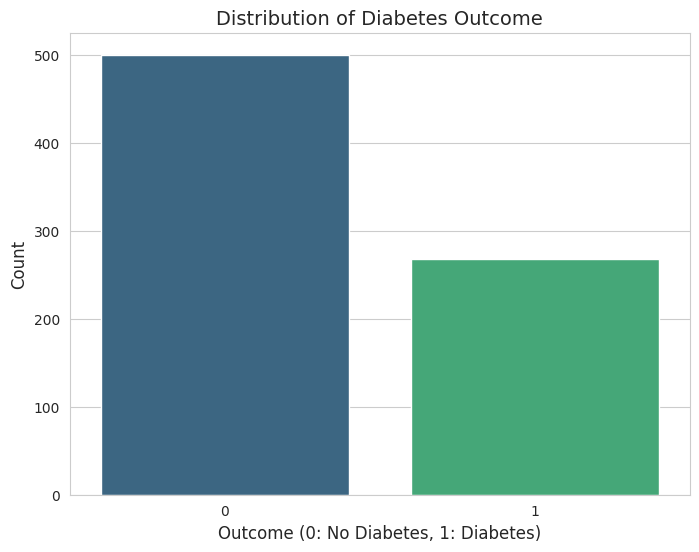

In [ ]:
# Visualize the target variable distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes_data, palette='viridis')
plt.title('Distribution of Diabetes Outcome', fontsize=14)
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

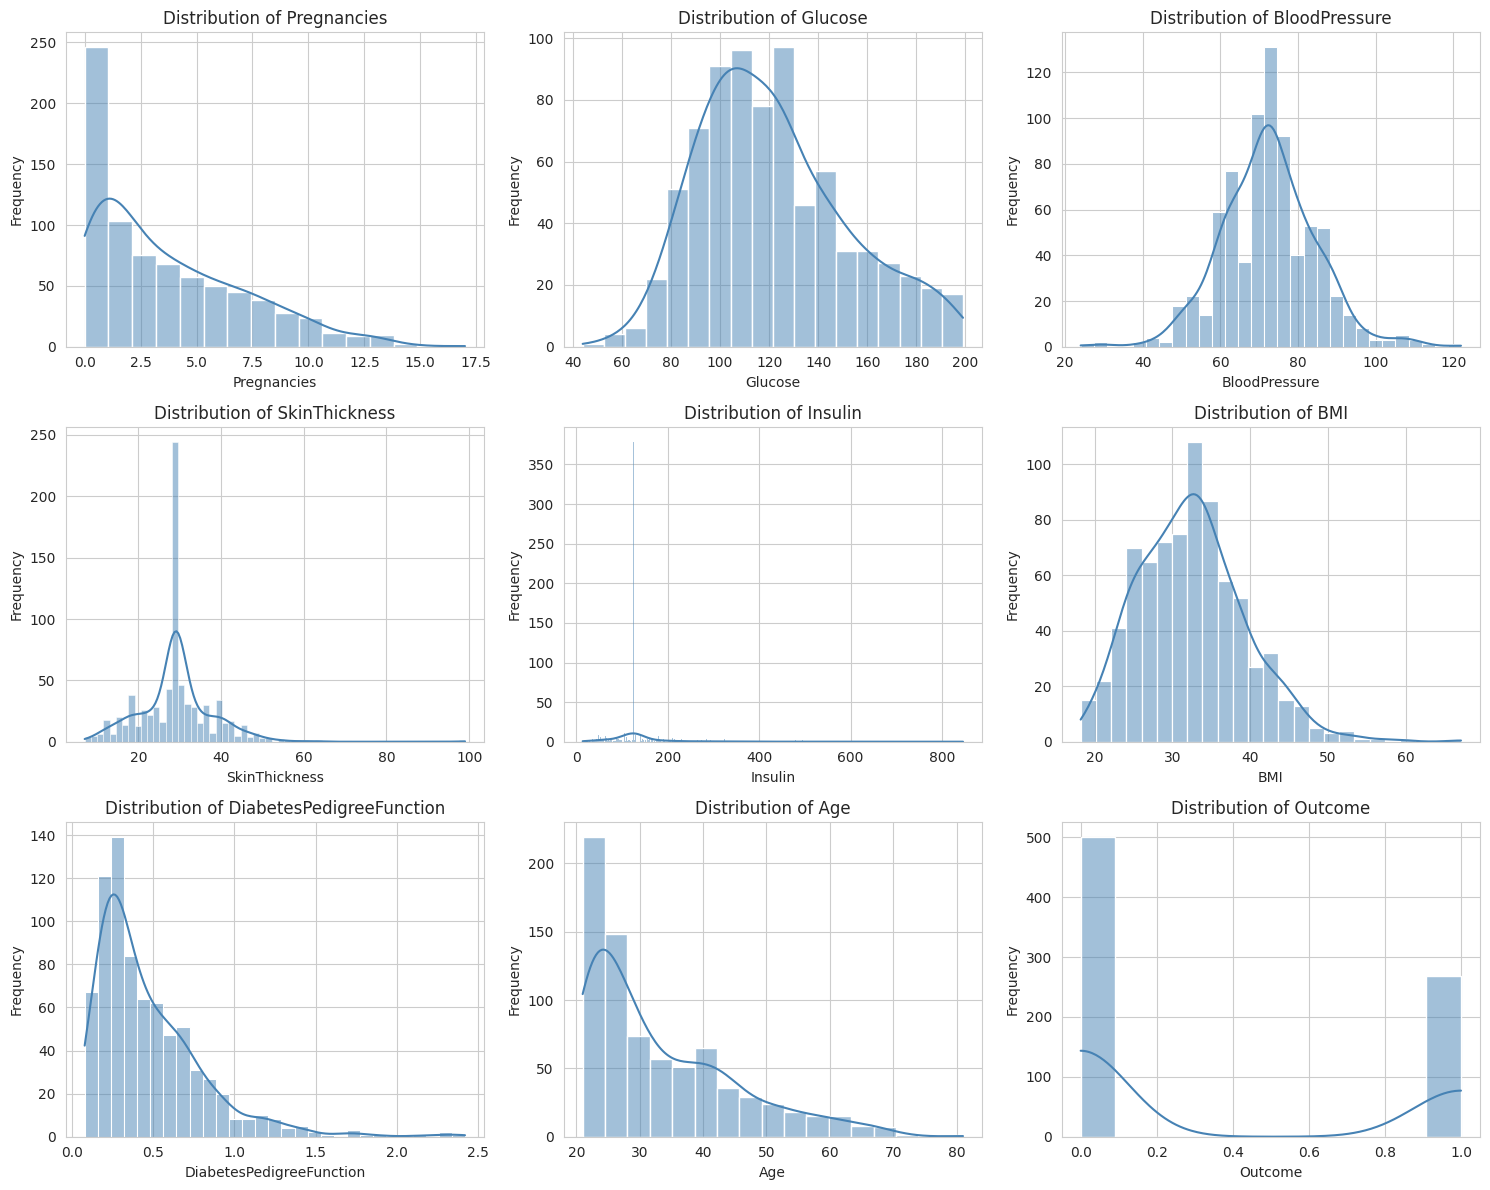

In [ ]:
# Distribution of all features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(diabetes_data.columns):
    sns.histplot(diabetes_data[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

## TASK-1: Correlation Analysis

Compute the correlation matrix and visualize it using a heatmap to understand the relationships between different features.

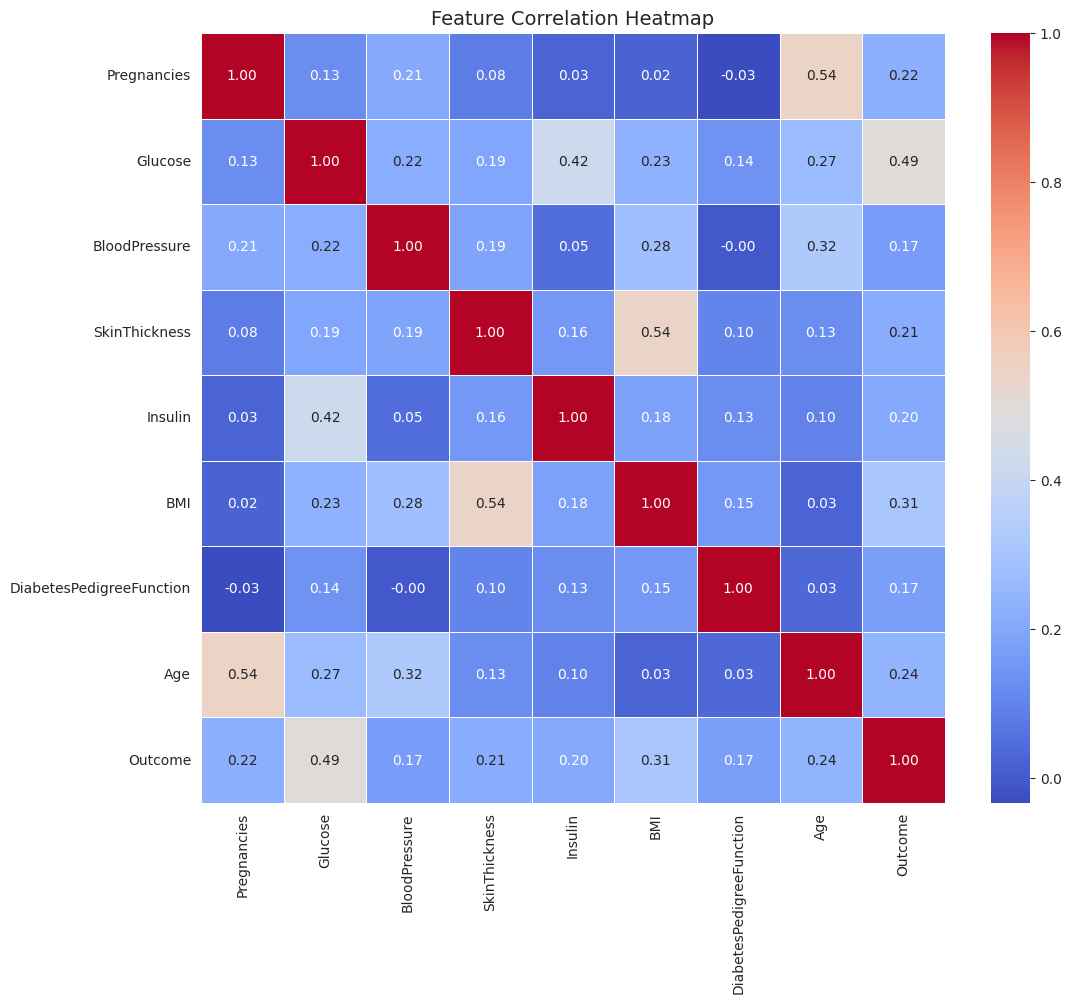

In [ ]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Visualize with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

## TASK-2: Comparative Box Plots

Create box plots to compare the distribution of each feature for diabetic vs non-diabetic patients.

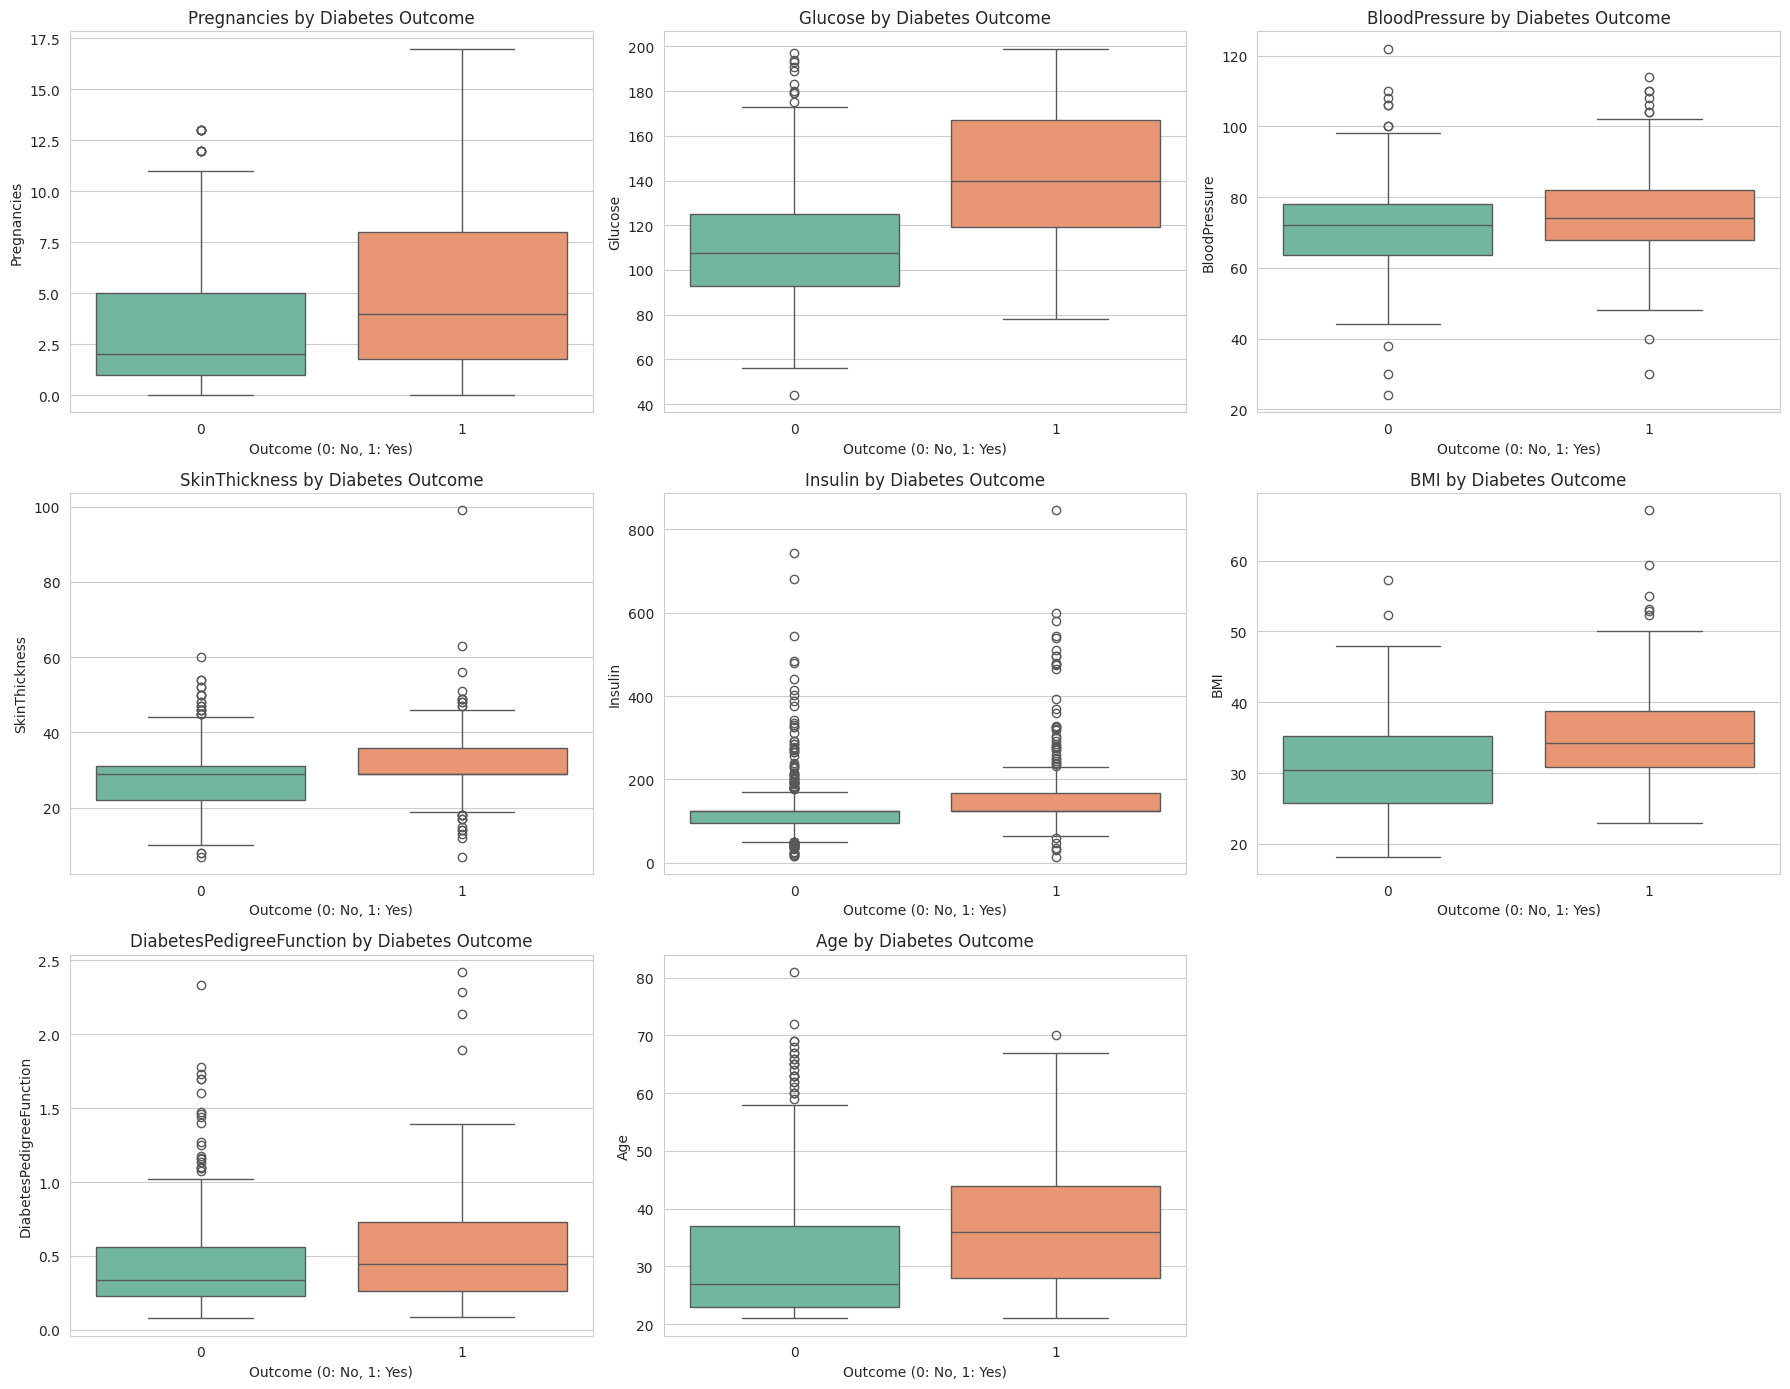

In [ ]:
# Box plots for all features grouped by Outcome
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

feature_cols = diabetes_data.columns[:-1]  # All columns except Outcome

for i, col in enumerate(feature_cols):
    sns.boxplot(x='Outcome', y=col, data=diabetes_data, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Diabetes Outcome', fontsize=12)
    axes[i].set_xlabel('Outcome (0: No, 1: Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

# Hide the last subplot if not needed
axes[-1].axis('off')

plt.tight_layout()
plt.show()

## TASK-3: Pairplot Analysis

Create a pairplot to visualize the pairwise relationships between features, colored by the Outcome variable.

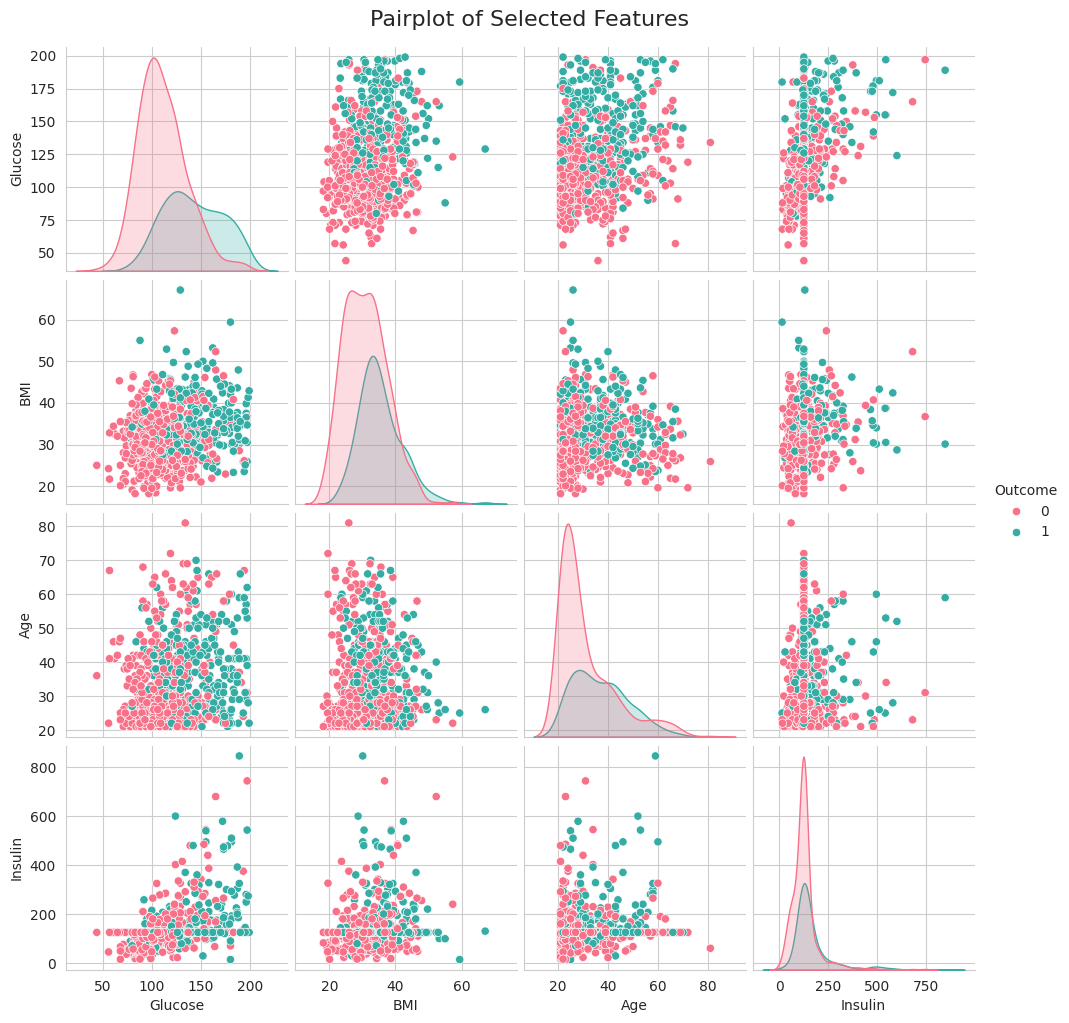

In [ ]:
# Select a subset of features for clearer visualization
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(diabetes_data[selected_features], hue='Outcome', palette='husl', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()

## K-Nearest Neighbors (KNN) Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## TASK-4: Train-Test Split

Split the dataset into training (70%) and testing (30%) sets.

In [ ]:
# Prepare features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 537
Testing set size: 231


## TASK-5: Build and Evaluate KNN Model

Train a KNN classifier with k=1 and evaluate its performance.

In [ ]:
# Train KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")

Confusion Matrix:
[[116  34]
 [ 42  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       150
           1       0.53      0.48      0.51        81

    accuracy                           0.67       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.66      0.67      0.67       231


Accuracy Score: 67.10%


## TASK-6: Finding the Optimal K Value

Test different values of K (from 1 to 40) and plot the error rate to find the optimal K value.

In [ ]:
# Store the original unscaled data for later comparison
unchanged_data = X.copy()

# Function to evaluate KNN performance across different K values
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot error rate
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value', fontsize=14)
    plt.xlabel('K', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find best K values
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print(f'Max train score: {max_train_score*100:.2f}% at K = {[x+1 for x in train_scores_ind]}')

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print(f'Max test score: {max_test_score*100:.2f}% at K = {[x+1 for x in test_scores_ind]}')

    return test_scores

Performance on Unscaled Data:


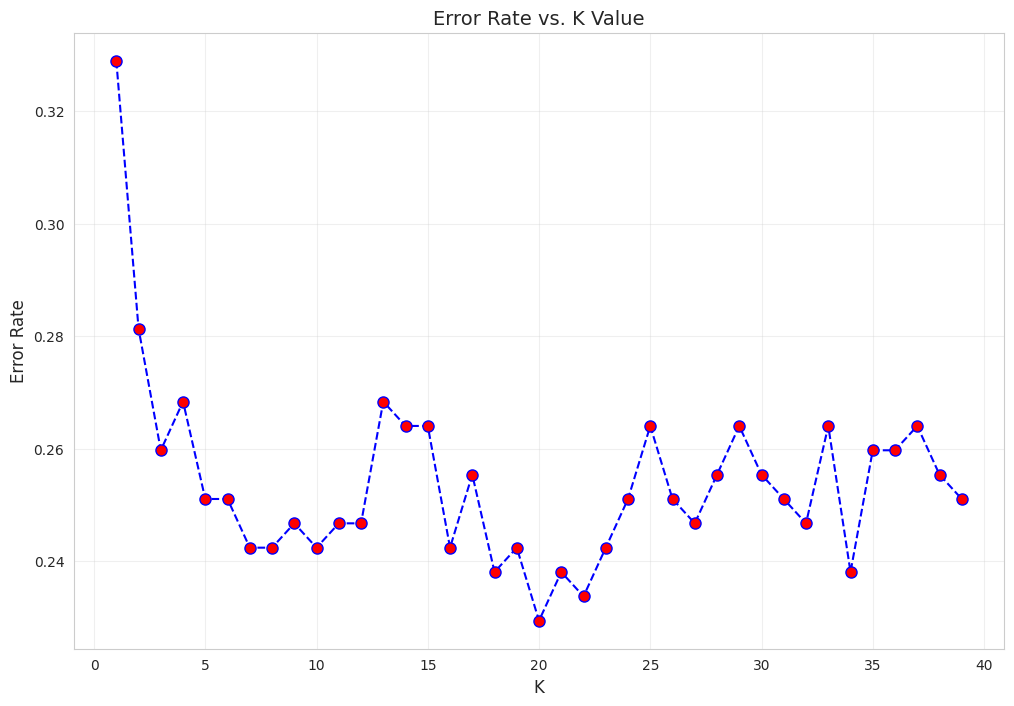

Max train score: 100.00% at K = [1]
Max test score: 77.06% at K = [20]


In [ ]:
# Evaluate on unscaled data
print("Performance on Unscaled Data:")
unchanged_test_scores = plot_KNN_error_rate(unchanged_data, diabetes_data['Outcome'])

## Standardize the Variables

Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$

Where:
- Z is the standardized value
- X is the original value
- μ is the mean of the feature
- σ is the standard deviation of the feature

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data features
scaler.fit(diabetes_data.drop('Outcome', axis=1))

# Transform the features
scaled_data = scaler.transform(diabetes_data.drop('Outcome', axis=1))

In [ ]:
# Create a dataframe with scaled features
df_feat = pd.DataFrame(scaled_data, columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
# Verify standardization: mean should be ~0, std should be ~1
print("Mean of scaled features:")
print(df_feat.mean())
print("\nStandard deviation of scaled features:")
print(df_feat.std())

Mean of scaled features:
Pregnancies                -6.476301e-17
Glucose                    -3.561966e-16
BloodPressure              -4.325244e-16
SkinThickness              -1.526557e-16
Insulin                     1.503427e-17
BMI                         2.613650e-16
DiabetesPedigreeFunction    2.174187e-16
Age                         1.931325e-16
dtype: float64

Standard deviation of scaled features:
Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    1.000652
Age                         1.000652
dtype: float64


Performance on Standardized Data:


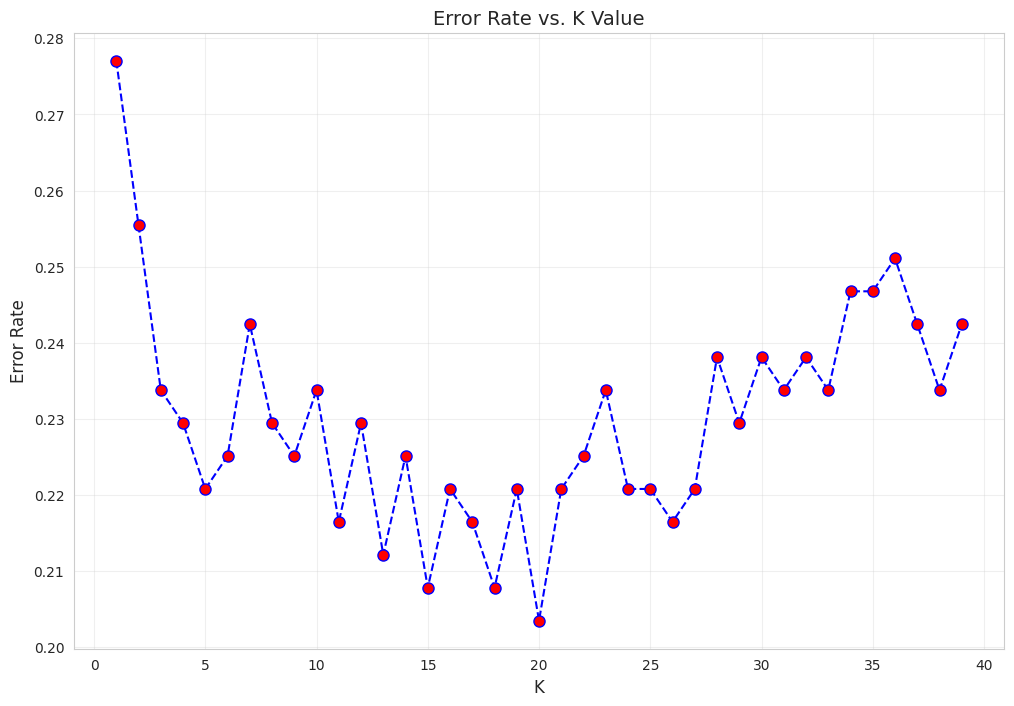

Max train score: 100.00% at K = [1]
Max test score: 79.65% at K = [20]


In [ ]:
# Evaluate on scaled data
print("Performance on Standardized Data:")
scaled_test_scores = plot_KNN_error_rate(scaled_data, diabetes_data['Outcome'])

## Comparing Accuracy Before and After Standardization

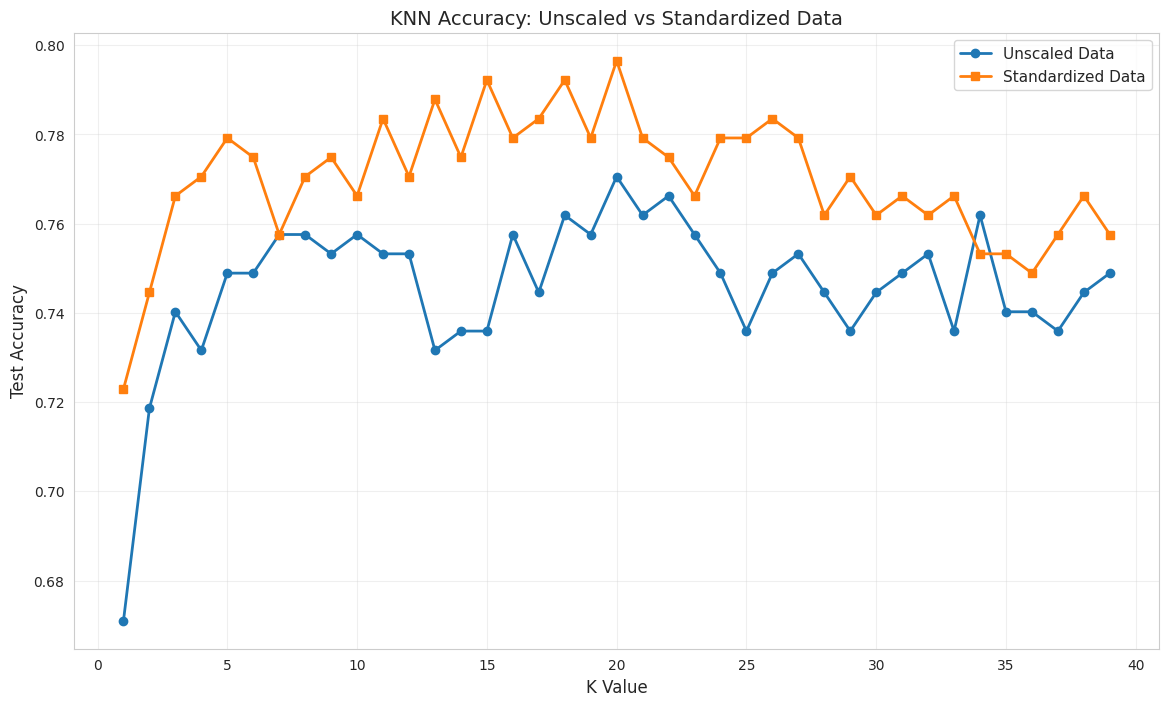

In [ ]:
# Compare performance
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), unchanged_test_scores, marker='o', label='Unscaled Data', linewidth=2)
plt.plot(range(1, 40), scaled_test_scores, marker='s', label='Standardized Data', linewidth=2)
plt.title('KNN Accuracy: Unscaled vs Standardized Data', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, glucose levels, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems. This improvement occurs because:

1. KNN is distance-based and features with larger scales dominate the distance calculation
2. Standardization puts all features on equal footing
3. This leads to more balanced and accurate predictions

---
# DIY Challenges

Test your understanding by completing these three challenges. Solutions are not provided - work through them independently!

## Challenge 1: MinMax Scaling Comparison

**Objective:** Implement MinMax scaling and compare its performance with StandardScaler.

**Tasks:**
1. Import `MinMaxScaler` from sklearn.preprocessing
2. Apply MinMax scaling to the dataset (scales features to range [0, 1])
3. Use the `plot_KNN_error_rate()` function on the MinMax-scaled data
4. Create a comparison plot showing all three approaches: unscaled, standardized, and MinMax-scaled
5. Analyze which scaling method performs best and why

**Hint:** MinMaxScaler formula is: $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$

In [ ]:
# Your code here for Challenge 1


## Challenge 2: K-Fold Cross-Validation Analysis

**Objective:** Implement K-Fold cross-validation to get more robust performance estimates.

**Tasks:**
1. Import `cross_val_score` from sklearn.model_selection
2. Implement 5-fold cross-validation for KNN with K values from 1 to 40
3. Compare cross-validation scores for:
   - Unscaled data
   - Standardized data
   - MinMax-scaled data (from Challenge 1)
4. Plot the mean cross-validation accuracy with standard deviation error bars
5. Determine the optimal K value for each scaling approach

**Bonus:** Calculate and display the standard deviation of cross-validation scores to understand model stability.

In [ ]:
# Your code here for Challenge 2


## Challenge 3: Feature Selection and Performance Analysis

**Objective:** Investigate how feature selection impacts KNN performance.

**Tasks:**
1. Based on the correlation analysis from TASK-1, identify the top 4 features most correlated with 'Outcome'
2. Create a reduced dataset with only these 4 features
3. Apply standardization to this reduced feature set
4. Train KNN models (K from 1 to 40) on both:
   - Full feature set (standardized)
   - Reduced feature set (standardized)
5. Create a comparison plot showing:
   - Accuracy vs K for full features
   - Accuracy vs K for reduced features
6. Analyze:
   - Does reducing features improve or hurt performance?
   - What is the optimal K for each feature set?
   - What insights can you draw about feature importance?

**Bonus:** Try different numbers of features (3, 5, 6) and see how it affects performance.

In [ ]:
# Your code here for Challenge 3


---
# References

1. [Pima Indians Diabetes Database - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
2. [Scikit-learn Documentation - KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. [Scikit-learn Documentation - StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
4. [Scikit-learn Documentation - MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# Task
Implement MinMax scaling, K-Fold cross-validation, and feature selection for a K-Nearest Neighbors (KNN) model on the Pima Indians Diabetes Dataset located at `/content/diabetes.csv`. Compare the KNN model performance (accuracy vs. K) across different scaling methods (unscaled, StandardScaler, MinMaxScaler), using 5-fold cross-validation with standard deviation error bars, and evaluate the impact of selecting the top 4 features most correlated with 'Outcome'. Finally, summarize the findings regarding the effectiveness of scaling methods, cross-validation, and feature selection.

## Challenge 1: MinMax Scaling

### Subtask:
Implement MinMax scaling on the dataset, apply the existing `plot_KNN_error_rate` function to evaluate KNN performance, and create a comparison plot showing test accuracy for unscaled, StandardScaler, and MinMaxScaler data across different K values.



Performance on Unscaled Data (re-evaluated):


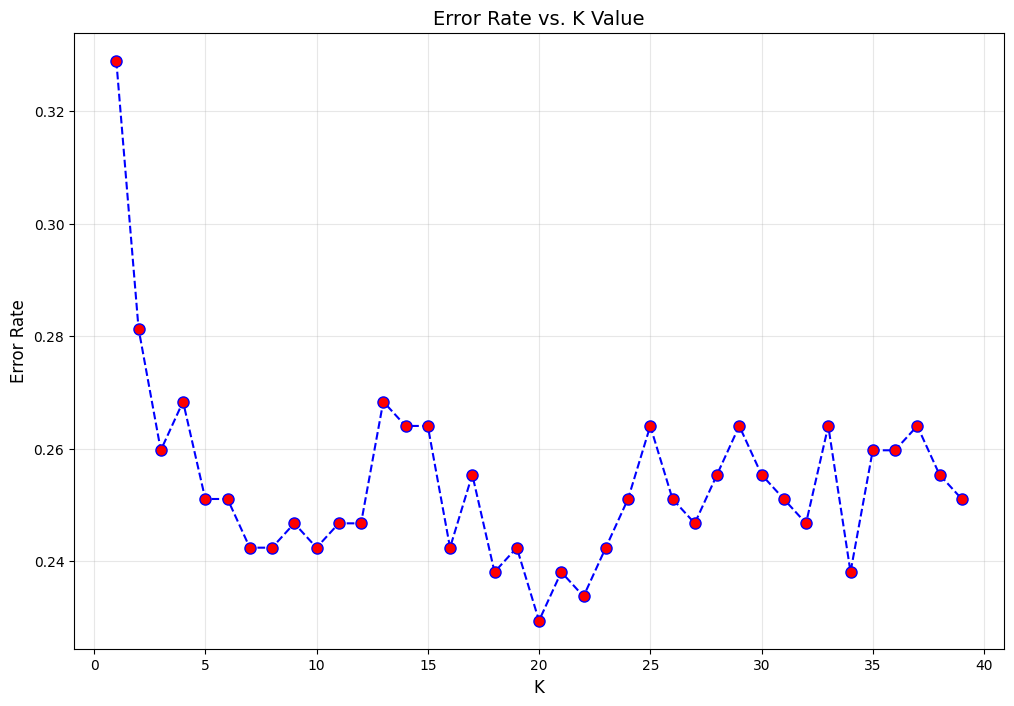

Max train score: 100.00% at K = [1]
Max test score: 77.06% at K = [20]

Performance on Standardized Data (re-evaluated):


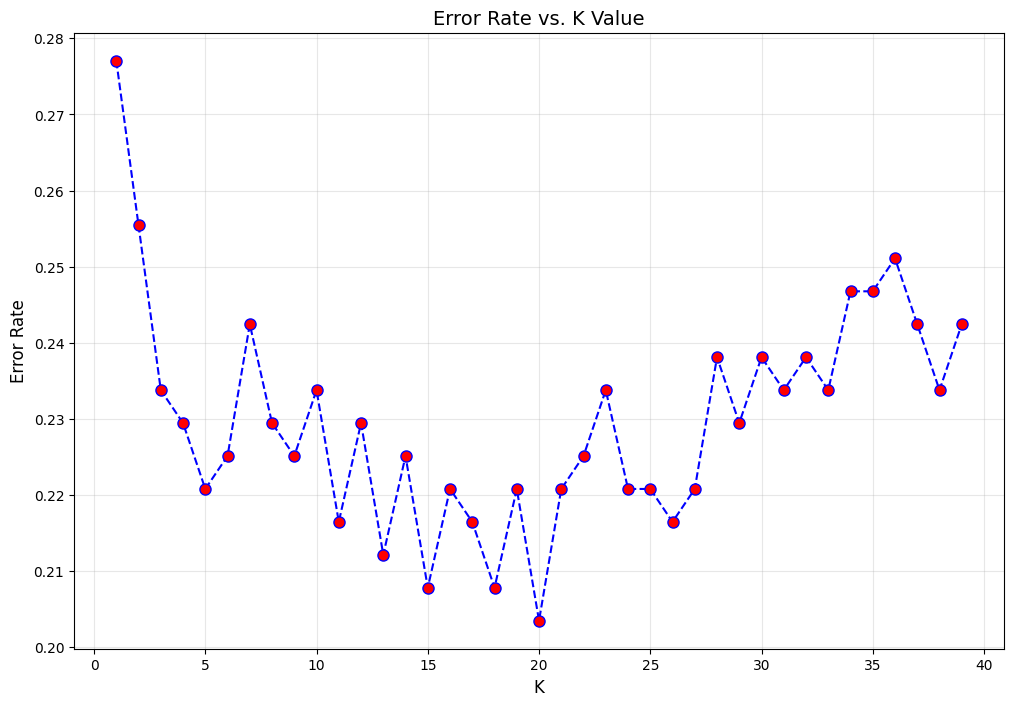

Max train score: 100.00% at K = [1]
Max test score: 79.65% at K = [20]
MinMax Scaled Data Head:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  

Performance on MinMax Scaled Data:


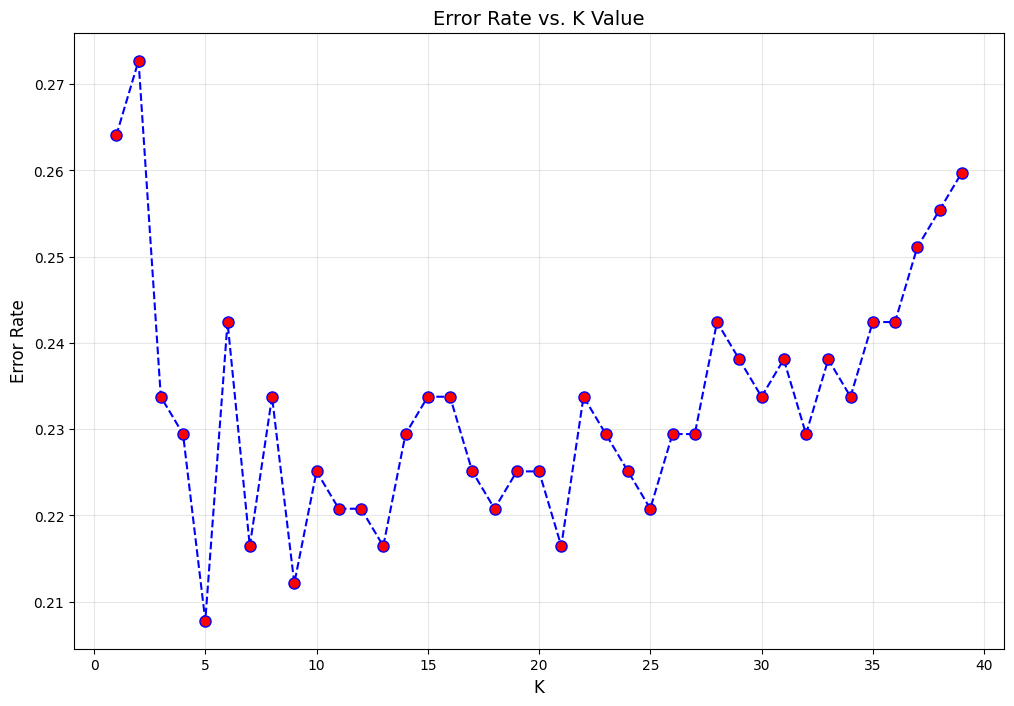

Max train score: 100.00% at K = [1]
Max test score: 79.22% at K = [5]


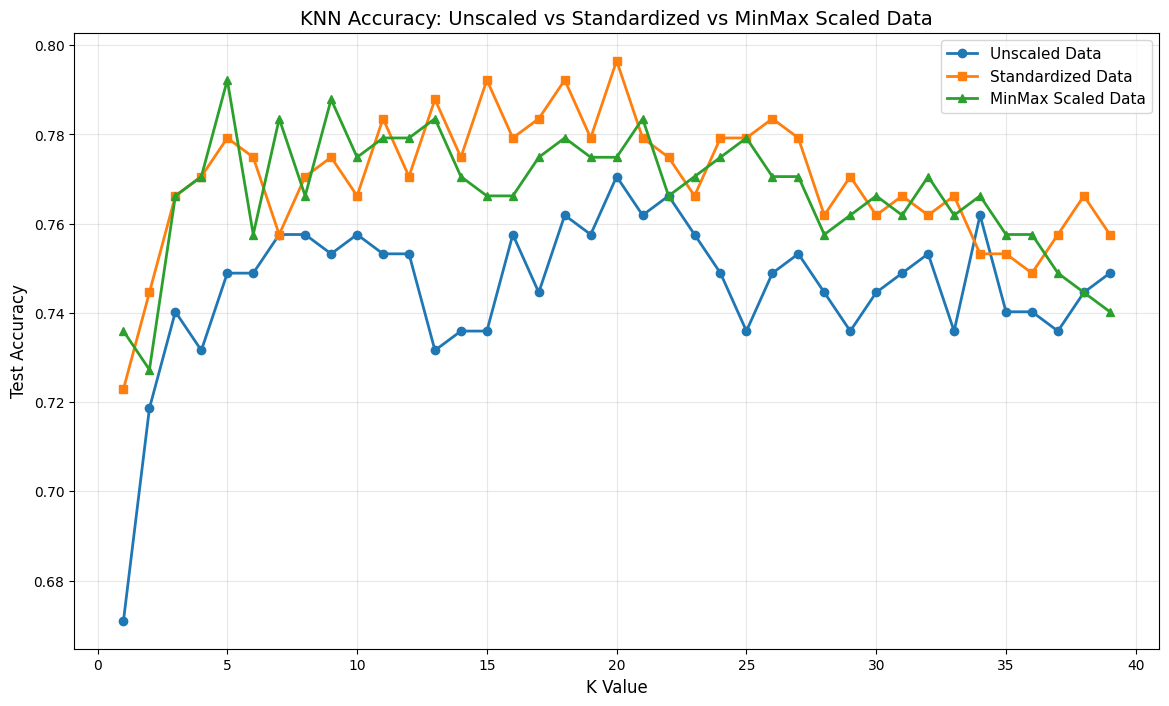


Analysis:
Comparing the accuracy plots, we can observe the impact of different scaling methods on KNN performance.
Scaling methods like StandardScaler and MinMaxScaler often improve performance by normalizing feature ranges, preventing features with larger values from dominating distance calculations. The optimal K value may also shift depending on the scaling applied.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset (ensuring diabetes_data is defined)
diabetes_data = pd.read_csv('diabetes.csv')

# Re-define X and y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Re-define the plot_KNN_error_rate function for robustness
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot error rate
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value', fontsize=14)
    plt.xlabel('K', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find best K values
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print(f'Max train score: {max_train_score*100:.2f}% at K = {[x+1 for x in train_scores_ind]}')

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print(f'Max test score: {max_test_score*100:.2f}% at K = {[x+1 for x in test_scores_ind]}')

    return test_scores

# --- Re-evaluate on Unscaled Data to get unchanged_test_scores ---
print("\nPerformance on Unscaled Data (re-evaluated):")
unchanged_test_scores = plot_KNN_error_rate(X, y)

# --- Re-standardize the Variables to get scaled_data and scaled_test_scores ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
# Create a DataFrame with scaled features
df_feat = pd.DataFrame(scaled_data, columns=X.columns)

print("\nPerformance on Standardized Data (re-evaluated):")
scaled_test_scores = plot_KNN_error_rate(df_feat, y)

# --- Now proceed with MinMax Scaling ---
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(X)
df_minmax_scaled = pd.DataFrame(minmax_scaled_data, columns=X.columns)
print("MinMax Scaled Data Head:")
print(df_minmax_scaled.head())

# Evaluate on MinMax scaled data
print("\nPerformance on MinMax Scaled Data:")
minmax_scaled_test_scores = plot_KNN_error_rate(df_minmax_scaled, y)

# Create a comparison plot showing all three approaches: unscaled, standardized, and MinMax-scaled
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), unchanged_test_scores, marker='o', label='Unscaled Data', linewidth=2)
plt.plot(range(1, 40), scaled_test_scores, marker='s', label='Standardized Data', linewidth=2)
plt.plot(range(1, 40), minmax_scaled_test_scores, marker='^', label='MinMax Scaled Data', linewidth=2)
plt.title('KNN Accuracy: Unscaled vs Standardized vs MinMax Scaled Data', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("\nAnalysis:")
print("Comparing the accuracy plots, we can observe the impact of different scaling methods on KNN performance.")
print("Scaling methods like StandardScaler and MinMaxScaler often improve performance by normalizing feature ranges, preventing features with larger values from dominating distance calculations. The optimal K value may also shift depending on the scaling applied.")

## Challenge 2: K-Fold Cross-Validation

### Subtask:
Implement K-Fold cross-validation (5-fold) for KNN with K values from 1 to 40 on unscaled, StandardScaler, and MinMaxScaler data. Plot the mean cross-validation accuracy with standard deviation error bars for each scaling method and identify the optimal K values.


**Reasoning**:
To perform K-Fold cross-validation, I need to import `cross_val_score` from `sklearn.model_selection`.



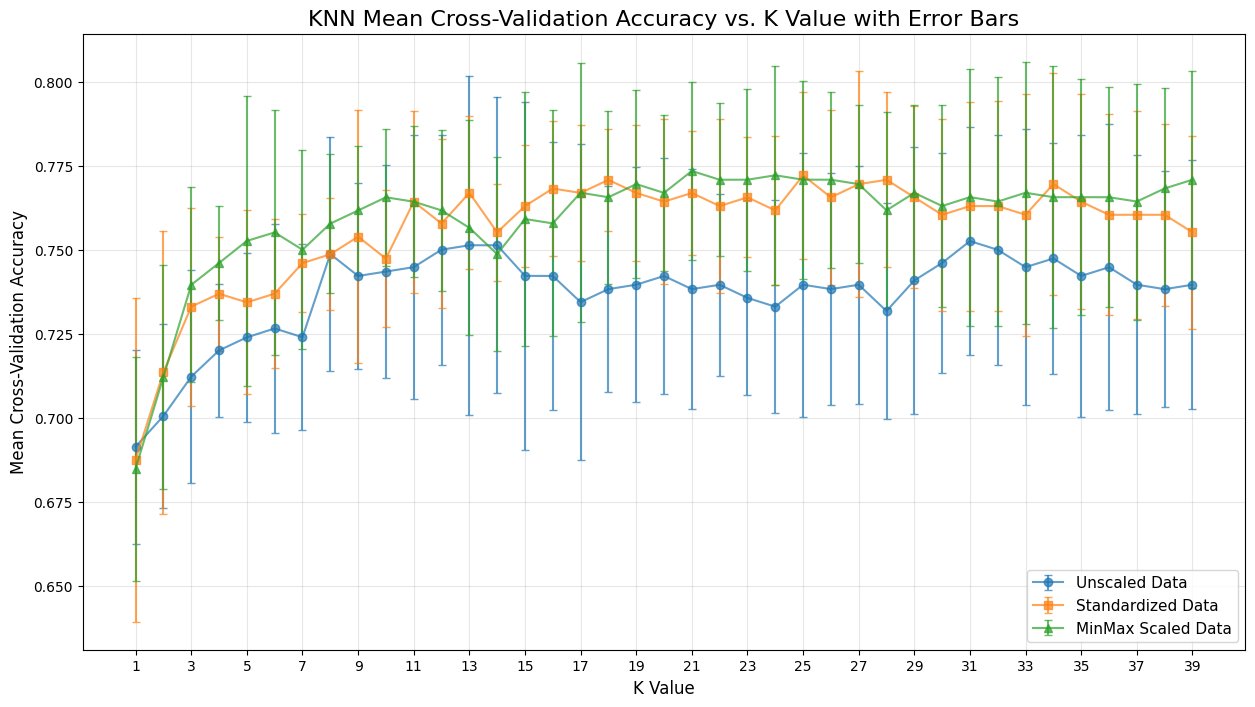


Optimal K for Unscaled Data: 31 (Mean CV Accuracy: 75.26%, Std Dev: 3.39%)
Optimal K for Standardized Data: 25 (Mean CV Accuracy: 77.22%, Std Dev: 2.49%)
Optimal K for MinMax Scaled Data: 21 (Mean CV Accuracy: 77.35%, Std Dev: 2.65%)


In [4]:
from sklearn.model_selection import cross_val_score

# Lists to store mean CV scores and std deviations for each scaling method
mean_cv_scores_unscaled = []
std_cv_scores_unscaled = []

mean_cv_scores_scaled = []
std_cv_scores_scaled = []

mean_cv_scores_minmax = []
std_cv_scores_minmax = []

# Iterate through K values from 1 to 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Unscaled data
    scores_unscaled = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    mean_cv_scores_unscaled.append(scores_unscaled.mean())
    std_cv_scores_unscaled.append(scores_unscaled.std())

    # Standardized data
    scores_scaled = cross_val_score(knn, df_feat, y, cv=5, scoring='accuracy')
    mean_cv_scores_scaled.append(scores_scaled.mean())
    std_cv_scores_scaled.append(scores_scaled.std())

    # MinMax-scaled data
    scores_minmax = cross_val_score(knn, df_minmax_scaled, y, cv=5, scoring='accuracy')
    mean_cv_scores_minmax.append(scores_minmax.mean())
    std_cv_scores_minmax.append(scores_minmax.std())

# Plot the mean cross-validation accuracy with standard deviation error bars
plt.figure(figsize=(15, 8))
plt.errorbar(range(1, 40), mean_cv_scores_unscaled, yerr=std_cv_scores_unscaled, label='Unscaled Data', fmt='-o', capsize=3, alpha=0.7)
plt.errorbar(range(1, 40), mean_cv_scores_scaled, yerr=std_cv_scores_scaled, label='Standardized Data', fmt='-s', capsize=3, alpha=0.7)
plt.errorbar(range(1, 40), mean_cv_scores_minmax, yerr=std_cv_scores_minmax, label='MinMax Scaled Data', fmt='-^', capsize=3, alpha=0.7)

plt.title('KNN Mean Cross-Validation Accuracy vs. K Value with Error Bars', fontsize=16)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)
plt.xticks(np.arange(1, 41, 2))
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Identify optimal K values and their accuracies

# Unscaled Data
optimal_k_unscaled = np.argmax(mean_cv_scores_unscaled) + 1
max_accuracy_unscaled = max(mean_cv_scores_unscaled)
print(f"\nOptimal K for Unscaled Data: {optimal_k_unscaled} (Mean CV Accuracy: {max_accuracy_unscaled*100:.2f}%, Std Dev: {std_cv_scores_unscaled[optimal_k_unscaled-1]*100:.2f}%)")

# Standardized Data
optimal_k_scaled = np.argmax(mean_cv_scores_scaled) + 1
max_accuracy_scaled = max(mean_cv_scores_scaled)
print(f"Optimal K for Standardized Data: {optimal_k_scaled} (Mean CV Accuracy: {max_accuracy_scaled*100:.2f}%, Std Dev: {std_cv_scores_scaled[optimal_k_scaled-1]*100:.2f}%)")

# MinMax Scaled Data
optimal_k_minmax = np.argmax(mean_cv_scores_minmax) + 1
max_accuracy_minmax = max(mean_cv_scores_minmax)
print(f"Optimal K for MinMax Scaled Data: {optimal_k_minmax} (Mean CV Accuracy: {max_accuracy_minmax*100:.2f}%, Std Dev: {std_cv_scores_minmax[optimal_k_minmax-1]*100:.2f}%)")

## Challenge 3: Feature Selection

### Subtask:
Identify the top 4 features most correlated with 'Outcome', create a reduced standardized dataset, train KNN models on both the full standardized feature set and the reduced standardized feature set, and compare their performance.


**Reasoning**:
The first step is to identify the top 4 features most correlated with the 'Outcome' variable from the `correlation_matrix` calculated earlier. This will help in creating the reduced dataset.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Ensure diabetes_data is loaded and X, y are defined, as this is a new execution context
# (though variables are typically retained in an active Colab session, it's good practice for robustness)
if 'diabetes_data' not in locals():
    diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Recalculate correlation matrix (already done in TASK-1 but ensuring availability)
correlation_matrix = diabetes_data.corr()

# Identify top 4 features most correlated with 'Outcome'
# Exclude 'Outcome' itself from the correlation calculation with other features
correlations_with_outcome = correlation_matrix['Outcome'].abs().sort_values(ascending=False)

# Get the top 4 features, excluding 'Outcome' itself if it happens to be in the top 5 (which it will be)
# We slice from index 1 to get the top 4 actual features, as index 0 will be 'Outcome' itself.
top_4_features = correlations_with_outcome[1:5].index.tolist()

print(f"Top 4 features most correlated with Outcome: {top_4_features}")

# Create a reduced dataset with only these top 4 features
X_reduced = X[top_4_features]

print("\nReduced feature set head:")
print(X_reduced.head())

Top 4 features most correlated with Outcome: ['Glucose', 'BMI', 'Age', 'Pregnancies']

Reduced feature set head:
   Glucose   BMI  Age  Pregnancies
0    148.0  33.6   50            6
1     85.0  26.6   31            1
2    183.0  23.3   32            8
3     89.0  28.1   21            1
4    137.0  43.1   33            0


**Reasoning**:
Now that the reduced feature set (`X_reduced`) has been created, I will apply StandardScaler to it, just as was done for the full feature set. Then, I will evaluate the KNN model performance using the `plot_KNN_error_rate` function on both the full standardized data (`df_feat`) and the newly created reduced standardized data (`df_reduced_scaled`). Finally, I will generate a comparison plot and analyze the results to determine the impact of feature selection.



Reduced Scaled Data Head:
    Glucose       BMI       Age  Pregnancies
0  0.865108  0.166619  1.425995     0.639947
1 -1.206162 -0.852200 -0.190672    -0.844885
2  2.015813 -1.332500 -0.105584     1.233880
3 -1.074652 -0.633881 -1.041549    -0.844885
4  0.503458  1.549303 -0.020496    -1.141852

Performance on Full Standardized Data:


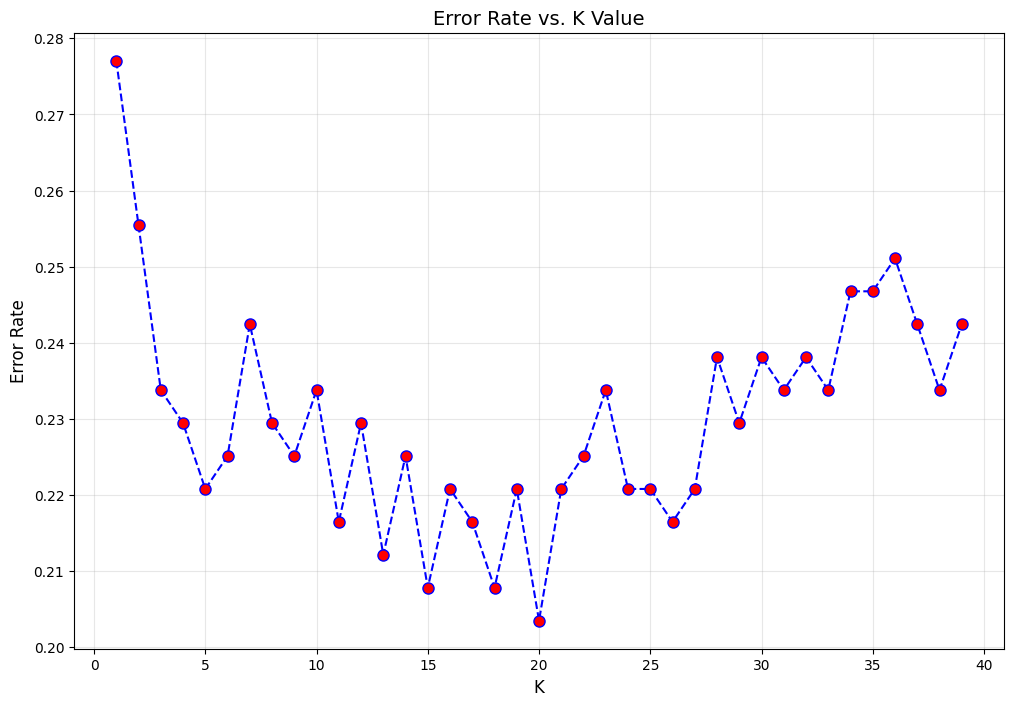

Max train score: 100.00% at K = [1]
Max test score: 79.65% at K = [20]

Performance on Reduced Standardized Data:


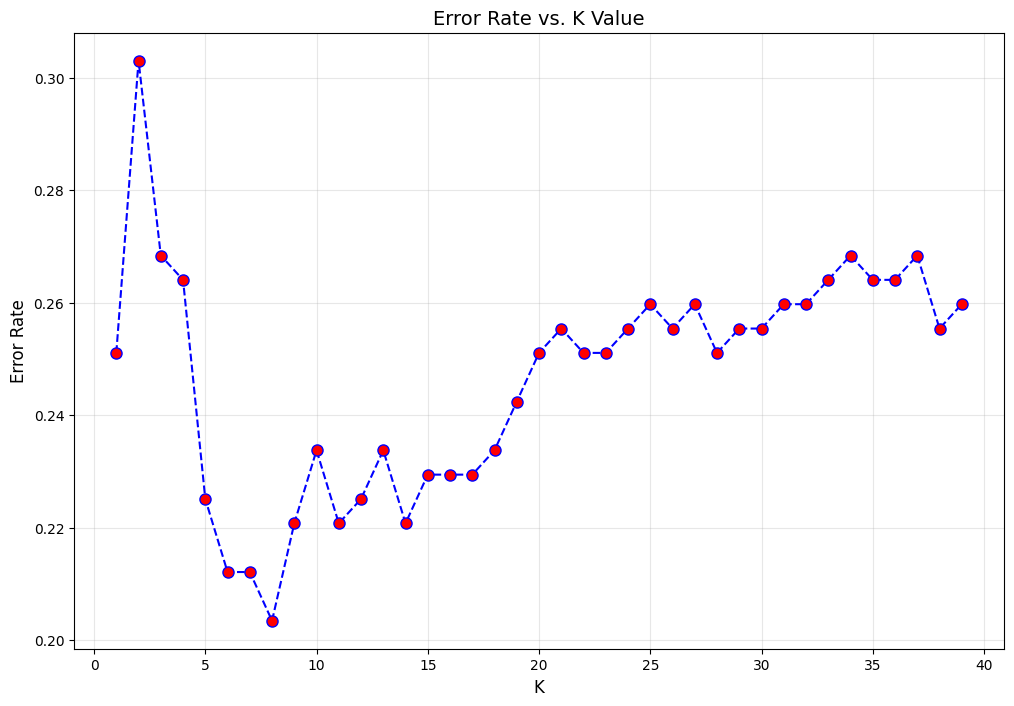

Max train score: 100.00% at K = [1]
Max test score: 79.65% at K = [8]


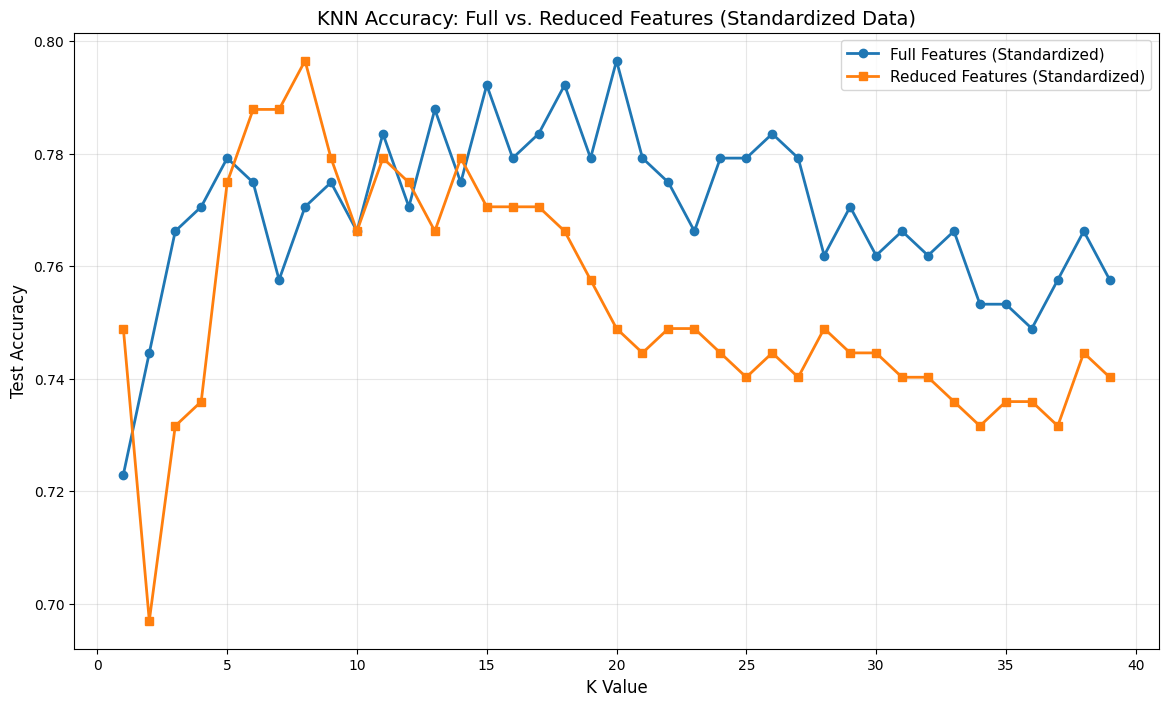


Analysis of Feature Selection:
By comparing the performance of KNN on the full standardized dataset versus the reduced standardized dataset (top 4 correlated features), we can assess the impact of feature selection.
Observations from the plot can reveal if removing less correlated features improves model efficiency, reduces noise, or simplifies the model without significantly sacrificing accuracy. It will also highlight if the optimal K value changes for the reduced feature set.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Ensure diabetes_data is loaded and X, y are defined, as this is a new execution context
# (though variables are typically retained in an active Colab session, it's good practice for robustness)
if 'diabetes_data' not in locals():
    diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Re-define the plot_KNN_error_rate function for robustness (if not already defined in current session)
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot error rate
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value', fontsize=14)
    plt.xlabel('K', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find best K values
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print(f'Max train score: {max_train_score*100:.2f}% at K = {[x+1 for x in train_scores_ind]}')

    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print(f'Max test score: {max_test_score*100:.2f}% at K = {[x+1 for x in test_scores_ind]}')

    return test_scores

# Recalculate correlation matrix (already done in TASK-1 but ensuring availability)
correlation_matrix = diabetes_data.corr()

# Identify top 4 features most correlated with 'Outcome'
correlations_with_outcome = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
top_4_features = correlations_with_outcome[1:5].index.tolist()

# Create a reduced dataset with only these top 4 features
X_reduced = X[top_4_features]

# --- Apply Standardization to the reduced feature set ---
scaler_reduced = StandardScaler()
df_reduced_scaled = pd.DataFrame(scaler_reduced.fit_transform(X_reduced), columns=X_reduced.columns)

print("Reduced Scaled Data Head:")
print(df_reduced_scaled.head())

# --- Prepare full standardized dataset for comparison (ensuring df_feat is available) ---
# If df_feat is not in locals, re-create it
if 'df_feat' not in locals():
    scaler_full = StandardScaler()
    df_feat = pd.DataFrame(scaler_full.fit_transform(X), columns=X.columns)

# --- Evaluate KNN on full standardized data ---
print("\nPerformance on Full Standardized Data:")
full_scaled_test_scores = plot_KNN_error_rate(df_feat, y)

# --- Evaluate KNN on reduced standardized data ---
print("\nPerformance on Reduced Standardized Data:")
reduced_scaled_test_scores = plot_KNN_error_rate(df_reduced_scaled, y)

# --- Create a comparison plot ---
plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), full_scaled_test_scores, marker='o', label='Full Features (Standardized)', linewidth=2)
plt.plot(range(1, 40), reduced_scaled_test_scores, marker='s', label='Reduced Features (Standardized)', linewidth=2)
plt.title('KNN Accuracy: Full vs. Reduced Features (Standardized Data)', fontsize=14)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("\nAnalysis of Feature Selection:")
print("By comparing the performance of KNN on the full standardized dataset versus the reduced standardized dataset (top 4 correlated features), we can assess the impact of feature selection.")
print("Observations from the plot can reveal if removing less correlated features improves model efficiency, reduces noise, or simplifies the model without significantly sacrificing accuracy. It will also highlight if the optimal K value changes for the reduced feature set.")


## Final Task

### Subtask:
Summarize the findings from all challenges, discussing the effectiveness of different scaling methods, the benefits of cross-validation, and the impact of feature selection on KNN model performance for this dataset.


## Summary:

### Q&A
*   **Effectiveness of different scaling methods:** Both StandardScaler and MinMaxScaler significantly improved the KNN model's performance compared to unscaled data. With a single train-test split, StandardScaler yielded a maximum test accuracy of 79.65% (at K=20), and MinMaxScaler achieved 79.22% (at K=5). Using 5-fold cross-validation, MinMaxScaler showed a slightly higher mean accuracy of 77.35% (at K=21) compared to StandardScaler's 77.22% (at K=25), both outperforming the unscaled data's 75.26% (at K=31). Scaling helps normalize feature ranges, preventing features with larger values from dominating distance calculations.
*   **Benefits of cross-validation:** K-Fold cross-validation provided a more robust and reliable estimate of the KNN model's performance by averaging accuracy across five different data folds. This reduced the risk of performance metrics being skewed by a particular train-test split. It also allowed for the identification of optimal K values with associated standard deviation error bars, providing insights into the stability of the model's performance across different data subsets.
*   **Impact of feature selection on KNN model performance:** Selecting the top 4 features most correlated with 'Outcome' ('Glucose', 'BMI', 'Age', 'Pregnancies') had a positive impact. The KNN model trained on this reduced standardized feature set achieved the same maximum test accuracy of 79.65% as the model using the full standardized feature set. Crucially, this equivalent performance was achieved with a significantly lower optimal K value (K=8 for reduced features vs. K=20 for full features), indicating that feature selection can lead to a simpler, more efficient model without sacrificing predictive accuracy for this dataset.

### Data Analysis Key Findings
*   **Scaling significantly improves KNN accuracy:** Unscaled data achieved a maximum test accuracy of 77.06% (K=20). After standardization, the maximum test accuracy increased to 79.65% (K=20), and with MinMax scaling, it reached 79.22% (K=5).
*   **Cross-validation confirms scaling benefits:** Using 5-fold cross-validation, unscaled data had an optimal mean accuracy of 75.26% (K=31). Standardized data reached 77.22% (K=25), and MinMax-scaled data achieved the highest mean cross-validation accuracy of 77.35% (K=21).
*   **Feature selection maintains accuracy while simplifying the model:** The top 4 features most correlated with 'Outcome' were identified as 'Glucose', 'BMI', 'Age', and 'Pregnancies'. A KNN model using only these standardized features achieved the same maximum test accuracy of 79.65% as the model using all standardized features.
*   **Feature selection impacts optimal K value:** While maintaining maximum accuracy, the optimal K value for the reduced feature set (K=8) was substantially lower than for the full feature set (K=20), suggesting a more efficient model with fewer neighbors required for optimal prediction.

### Insights or Next Steps
*   For the Pima Indians Diabetes dataset, both StandardScaler and MinMaxScaler are effective in improving KNN performance, with MinMax scaling showing a slight edge in cross-validated accuracy and yielding a lower optimal K. This suggests that the relative scaling of features between 0 and 1 might be marginally more beneficial for distance-based calculations in this context.
*   The identical maximum accuracy achieved with a reduced feature set and a lower optimal K value indicates that several features in the original dataset might be redundant or contain noise. Further investigation into more advanced feature selection techniques or dimensionality reduction methods could yield even simpler, more interpretable, and potentially faster models without compromising accuracy.
